# Защита персональных данных клиентов

Необходимо защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('/datasets/insurance.csv') #прочитаем файл

In [3]:
def discover(data):
    display(data.describe())
    display(data.info())
    display(f'Количество пропусков:{data.isna().sum()}')
    display(f'Количество дубликатов:{data.duplicated().sum()}')

In [4]:
discover(data)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

'Количество пропусков:Пол                  0\nВозраст              0\nЗарплата             0\nЧлены семьи          0\nСтраховые выплаты    0\ndtype: int64'

'Количество дубликатов:153'

Удалим дубликаты

In [5]:
data = data.drop_duplicates()

Переименуем столбцы и заменим тип данных для удобства

In [6]:
data.columns = ['gender', 'age', 'salary', 'family_members', 'insurance_payments']

In [7]:
data = data.astype('int')

In [8]:
data.head(5) #проверим изменения

,gender,age,salary,family_members,insurance_payments
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


**Соотношение клиентов по гендерному признаку**

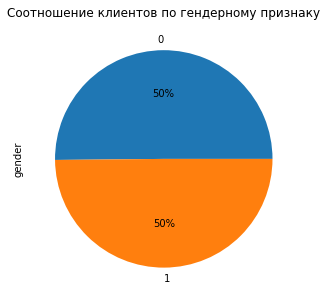

In [9]:
data['gender'].value_counts().plot(
    kind = 'pie',
    y = data, 
    autopct='%1.0f%%',
    figsize=(5,5),
    title = 'Соотношение клиентов по гендерному признаку');

**Возраст клиентов**

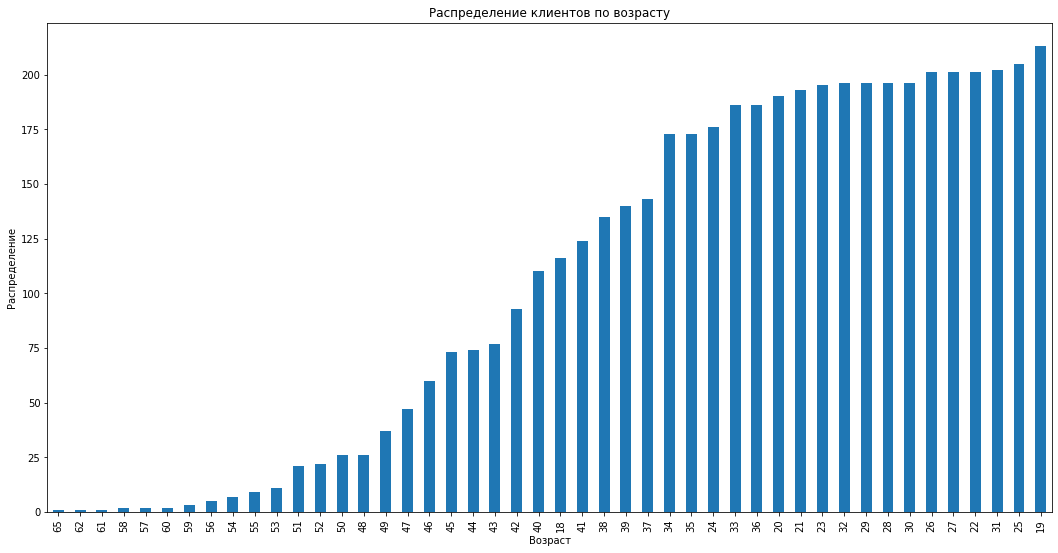

In [10]:
data['age'].value_counts(ascending=True).plot(
    kind = 'bar',
    xlabel = 'Возраст',
    ylabel = 'Распределение',
    figsize=(18,9),
    title = 'Распределение клиентов по возрасту');

**Заработная плата**

Заработная плата


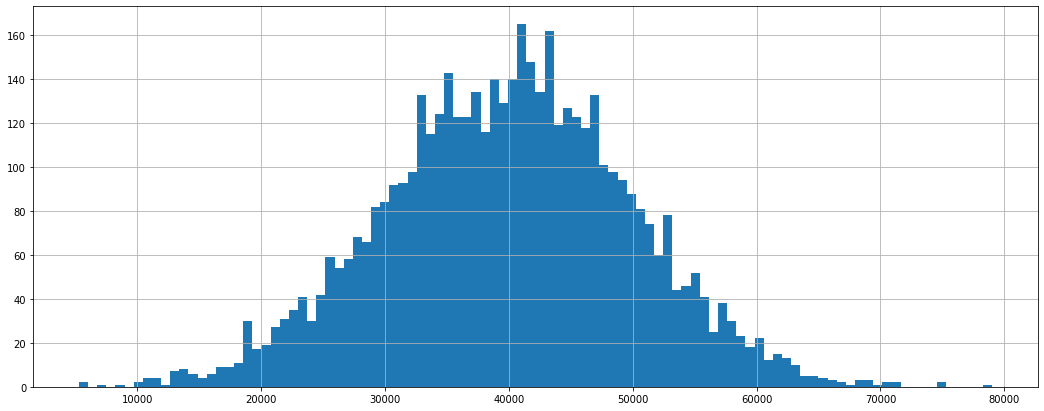

In [11]:
data['salary'].hist(figsize=(18, 7), bins=100)
print('Заработная плата')

**Количество членов семьи**

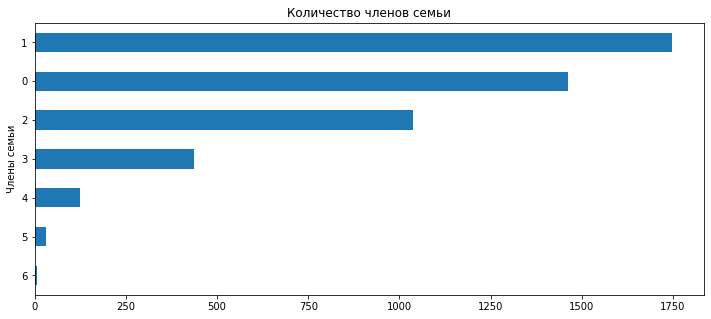

In [12]:
data['family_members'].value_counts(ascending=True).plot(
    kind = 'barh',
    x = 'user_id',
    xlabel = 'Члены семьи',
    figsize=(12,5),
    title = 'Количество членов семьи'); #посмотрим диаграмму

**Количество страховых выплат**

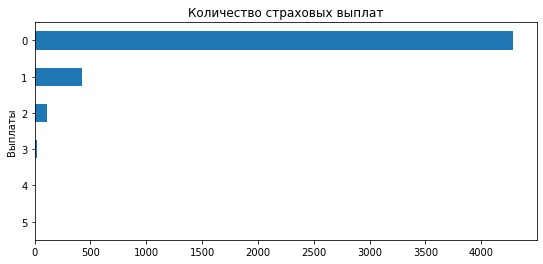

In [13]:
data['insurance_payments'].value_counts(ascending=True).plot(
    kind = 'barh',
    x = 'user_id',
    xlabel = 'Выплаты',
    figsize=(9,4),
    title = 'Количество страховых выплат');

<div style="border:solid steelblue 2px; padding: 10px; border-radius: 5px"> 
Пропуски в данных отсутствуют, удалила дубликаты, переименовала столбцы и заменила тип данных на целочисленный.<br>
    
    Соотношение клиентов по гендерному признаку практически одинаково.
    Возраст застрахованных лиц от 18 до 65 лет, средний возраст составляет 31 год. 
    Средний доход около 40 тысяч рублей. 
    Наибольшее число застрахованных не получали страховые выплаты.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Ответьте на вопрос и обоснуйте решение. \
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

<div style="border:solid steelblue 2px; padding: 10px; border-radius: 5px">
    
**Ответ:** Не изменится

**Обоснование:** 
    
Используем свойства обратной матрицы 
$$
(𝐴𝐵)^{−1}=𝐵^{−1}𝐴^{−1}
$$
 

    
Предсказания: $𝑎=𝑋𝑤$
 
Формула обучения: $𝑤=(𝑋^𝑇𝑋)^{−1}𝑋^𝑇𝑦$

    
Вот какие математические операции содержит эта формула: 
- Транспонированная матрица признаков умножается на себя;
- Вычисляется обратная к результату матрица;
- Обратная умножается на транспонированную матрицу признаков;
- Результат умножается на вектор значений целевого признака.
<br>    

    
Заменим $w$ в формуле предсказания
$$
a = Xw = X(X^T X)^{-1} X^Ty
$$
$$
a = X(X^T X)^{-1} X^Ty
$$


    
Умножим $w$ вектор весов линейной регрессии на $P$ — матрица, на которую умножаются признаки
    
$$
w = (X^T X)^{-1} X^Ty
$$
    
$$
w_P = ((XP)^T(XP))^{-1}(XP)^Ty
$$
    
Применим к формуле предсказания и сократим
    $$
    a_P = XPw_P = XP((XP)^T(XP))^{-1}(XP)^Ty = XP(P^TX^TXP)^{-1}P^TX^Ty = XPP^{-1}(X^TX)^{-1}P^TX^Ty
    $$

здесь применим $AA^{-1} = A^{-1}A = E$
    $$
    a_P = XPP^{-1}(X^TX)^{-1}P^TX^Ty = XE(X^TX)^{-1}EX^Ty = X(X^TX)^{-1}X^Ty
    $$
    
$$
a_P = X(X^TX)^{-1}X^Ty
$$

Таким образом $a = a_P$

<div style="border:solid steelblue 2px; padding: 10px; border-radius: 5px"> 
$$
w = (X^T X)^{-1} X^Ty
$$
    
$$
w_P = ((XP)^T(XP))^{-1}(XP)^Ty
$$
    
    
    

<div style="border:solid steelblue 2px; padding: 10px; border-radius: 5px"> 

Через свойства умножения матриц,транспонирования и обратных матриц
  
$$
w_P = ((XP)^T(XP))^{-1}(XP)^Ty = ((P^T(X^TX)P)^{-1})P^TX^Ty = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty = P^{-1}(X^TX)^{-1}X^Ty = P^{-1}w
$$

подставим результат $w_P$ в предсказание $a_P$ 
    
    
$$
a_P = XPP^{-1}w = Xw = a
$$
    
Таким образом $w_p = w$
    

<div class="alert-info" style="padding: 20px; border-radius: 10px"> 
$$
w = \arg\min_w MSE(Xw, y)
$$   
формула задачи обучения линейной регрессии для функции потерь MSE, функция argmin() находит минимум и возвращает, при каком аргументе он был достигнут

    
здесь умножаем вектор весов линейной регрессии (нулевой элемент равен сдвигу) на матрицу, на которую умножаются признаки
    
$$
w_P = \arg\min_w MSE(XPw_p, y)
$$    

## Алгоритм преобразования

**Алгоритм**
1. Создадим квадратную матрицу, равную количеству строк в матрице признаков.
2. Проверим матрицу на обратимость.
3. Зашифруем данные, умножив признаки на матрицу.


**Обоснование**

В пункте 2 пришли к выводу, что умножение матриц не повлиет на качество линейной регрессии.
Преобразование матрицы признаков обеспечивает дополнительную безопасность.

## Проверка алгоритма

Обозначим признаки и целевой признак

In [14]:
features = data.drop('insurance_payments', axis=1)
target = data['insurance_payments']

In [15]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345) 
#разделение на тестовую и тренировочную выборки

In [16]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w =  np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print('Значение метрики R2 на исходных данных',r2_score(target_test, predictions))

Значение метрики R2 на исходных данных 0.423077276158367


In [17]:
matrix = np.random.randint(80, size=(4, 4))
matrix #квадратная матрица

array([[75, 61,  5, 20],
       [11, 35, 12,  7],
       [22, 78, 69, 71],
       [67, 33, 18, 43]])

In [18]:
matrix_inv = np.linalg.inv(matrix)
matrix_inv #обратная матрица

array([[-0.23428794,  0.46152523, -0.12668241,  0.2430124 ],
       [ 0.19903469, -0.35075551,  0.09807855, -0.1974182 ],
       [-0.64777704,  1.25132415, -0.31909064,  0.6244583 ],
       [ 0.48346823, -0.97374636,  0.25569211, -0.46528558]])

Создадим новый датасет с зашифрованными данными, умножим данные на матрицу

In [19]:
data_new = features @ matrix
display(data_new)

,0,1,2,3
0,1091793,3870329,3422915,3521950
1,836573,2965643,2622570,2698365
2,462319,1639015,1449348,1491203
3,917765,3253401,2877588,2960933
4,574583,2036841,1801241,1853316
...,...,...,...,...
4995,785842,2785646,2463672,2534982
4996,1153241,4088423,3616026,3720681
4997,746154,2644966,2339376,2407126
4998,719918,2551530,2256623,2322003


In [20]:
features_train = features_train.dot(matrix)
features_test = features_test.dot(matrix)
    
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print('Значение метрики R2 на преобразованных данных',r2_score(target_test, predictions))

Значение метрики R2 на преобразованных данных 0.4230985904976028


<div class="alert-info" style="padding: 20px; border-radius: 10px">  
Качество линейной регрессии до и после преобразования не отличается:<br/>  

Значение метрики R2 на исходных данных 0.423077276158367<br/> 
Значение метрики R2 на преобразованных данных 0.4230772761583761

<div class="alert-info" style="padding: 20px; border-radius: 10px">
При загрузке и предобработке данных:<br/>
Пропуски в данных отсутствуют, удалила дубликаты, переименовала столбцы и заменила тип данных на целочисленный.
Соотношение клиентов по гендерному признаку практически одинаково.
Возраст застрахованных лиц от 18 до 65 лет, средний возраст составляет 31 год. 
Средний доход около 40 тысяч рублей. 
Наибольшее число застрахованных не получали страховые выплаты.<br/>
    
    
При умножении признаков на обратимую матрицу качество линейной регрессии не изменится.

    
Преобразование матрицы признаков обеспечивает дополнительную безопасность.
    
Качество линейной регрессии до и после преобразования не отличается:
- Значение метрики R2 на исходных данных 0.423077276158367
- Значение метрики R2 на преобразованных данных 0.4230772761583761